In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

import string
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#read the csv file with scraped data
df=pd.read_csv('Scraped_new_output.csv',error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
Category          405 non-null object
Title             405 non-null object
Authors           405 non-null object
Text              405 non-null object
Image             405 non-null object
Videos            405 non-null object
Link              405 non-null object
Published_Date    342 non-null object
dtypes: object(8)
memory usage: 25.4+ KB


In [6]:
df['Title'] = df['Title'].astype(str)
df['Text'] = df['Text'].astype(str)

In [7]:
#function to lemmatize the text    
def lemmatize_text(text):
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


In [8]:
#function to stemmize the texts
def title_stemming(text):
    ps = PorterStemmer()
    l = []
    for i in text:
        for j in i:
            #converts list item to lower case
            p=j.lower()
            # removes punctuation,numbers and returns list of words
            q=re.sub('[^A-Za-z]+', ' ', p)
            l.append(ps.stem(q))
    return l

In [84]:
#function to find the most occuring words in the title column     
def freq_words_title(df):
    df['Title_lemmatized'] = df.Title.apply(lemmatize_text)
    lemmatization_title=df['Title_lemmatized']
    top_N = 100
    a=title_stemming(lemmatization_title)

    #remove all the stopwords from the text
    stop_words = list(get_stop_words('en'))         
    nltk_words = list(stopwords.words('english'))   
    stop_words.extend(nltk_words)

    words_to_remove=['thi','also','it ','us ','one',' ','. ','said','say','new','like','get','make','last','use','said ','new ','get ','say ','xbox ']
    filtered_sentence = []
    for w in a:
        if w not in (stop_words):
            if w not in (words_to_remove):
                filtered_sentence.append(w)

    # Remove characters which have length less than 2  
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    # Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

    # Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    rslt = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])

    plt.figure(figsize=(7,4))
    sns.set(style="darkgrid")
    ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))
    sentiments_title(df)

In [89]:
#function to calculate the sentiment on title column
def sentiments_title(df):
    bloblist_desc = list()

    df_review_str=df['Title'].astype(str)

    for row in df_review_str:
        blob = TextBlob(row)
        bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
        df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Title','sentiment','polarity'])

    df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f_title, axis=1)
    
    plt.figure(figsize=(5,4))
    sns.set(style="darkgrid")
    ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)
    
    

In [90]:
#function to add the sentiment type
def f_title(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Title"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Title"
    else:
        val = "Negative Title"
    return val

## Frequency distribution of words in article titles & plot of sentiments

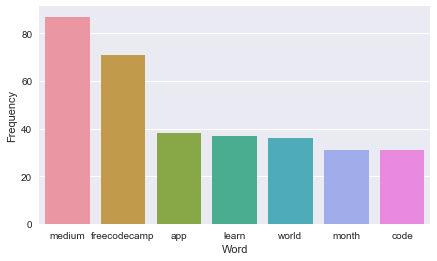

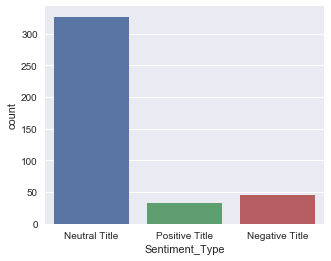

In [91]:
freq_words_title(df)

In [151]:
#function to calculate the most occuring words in the content column
def freq_words_content(df):
    top_N = 100
    df['Content_lemmatized'] = df.Text.apply(lemmatize_text)
    lemmatization_content=df['Content_lemmatized']
    a = title_stemming(lemmatization_content)
    
    #remove all the stopwords from the text
    stop_words = list(get_stop_words('en'))         
    nltk_words = list(stopwords.words('english'))   
    stop_words.extend(nltk_words)
    
    words_to_remove=['thi','also','it ','us ','one',' ','. ','said','say','new','like','get','make','last','use','said ']
    filtered_sentence = []
    for w in a:
        if w not in (stop_words):
            if w not in (words_to_remove):
                filtered_sentence.append(w)
    
    # Remove characters which have length less than 2  
    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    # Remove numbers
    cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

    # Calculate frequency distribution
    word_dist = nltk.FreqDist(cleaned_data_title)
    rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

    plt.figure(figsize=(7,4))
    sns.set(style="darkgrid")
    ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))
    sentiments_content(df)

In [152]:
#function to calculate the sentiment on the content column
def sentiments_content(df):
    bloblist_desc_content = list()

    df_review_str_content=df['Text'].astype(str)
    
    for row in df_review_str_content:
        blob_content = TextBlob(row)
        bloblist_desc_content.append((row,blob_content.sentiment.polarity, blob_content.sentiment.subjectivity))
        df_polarity_desc_content = pd.DataFrame(bloblist_desc_content, columns = ['Text','sentiment','polarity'])
    
    df_polarity_desc_content['Sentiment_Type'] = df_polarity_desc_content.apply(f_content, axis=1)
    
    plt.figure(figsize=(5,4))
    sns.set(style="darkgrid")
    ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc_content)

In [153]:
#function to add the sentiment type 
def f_content(df_polarity_desc_content):
    if df_polarity_desc_content['sentiment'] > 0:
        val = "Positive Content"
    elif df_polarity_desc_content['sentiment'] == 0:
        val = "Neutral Content"
    else:
        val = "Negative Content"
    return val

 Frequency distribution of words in the article content & plot of sentiments

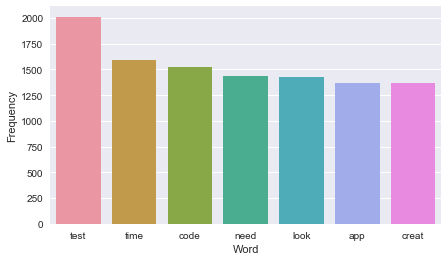

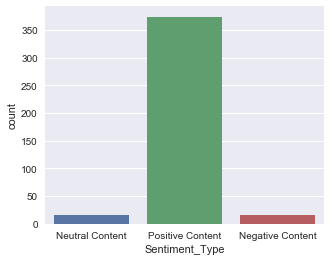

In [154]:
freq_words_content(df)

## Analysing text by TF-IDF

In [98]:
#removing punctuations
df['newText'] = df['Text'].str.replace('[^\w\s]','')

#removing stop words
stop = stopwords.words('english')
df['newText'] = df['newText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df['newText'].head()

#removing rare words
freq = pd.Series(' '.join(df['newText']).split()).value_counts()[:10]
freq = list(freq.index)
df['newText'] = df['newText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
rare = pd.Series(' '.join(df['newText']).split()).value_counts()[-10:]
rare = list(rare.index)
df['newText'] = df['newText'].apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))

#Term Frequency
tf1 = (df['newText'][1:2]).apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

#IDF
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df['newText'].shape[0]/(len(df[df['newText'].str.contains(word)])))

tf1.sort_values(by=['idf'],ascending=False)

#TF-IDF
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.sort_values(by=['idf'],ascending=False).head()

,words,tf,idf,tfidf
279,shapes,1,3.806662,3.806662
377,proud,1,3.806662,3.806662
394,windsurf,1,3.806662,3.806662
281,underqualified,1,3.806662,3.806662
282,apologize,1,3.806662,3.806662


## plot of TF-IDF against words

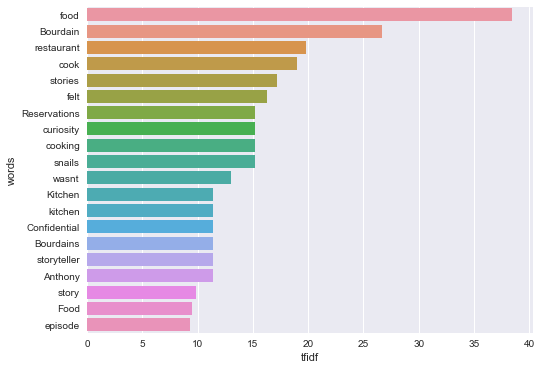

In [129]:
topvacab = tf1.sort_values(by='tfidf',ascending=False)
top_vacab = topvacab.head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='tfidf',y='words', data=top_vacab)

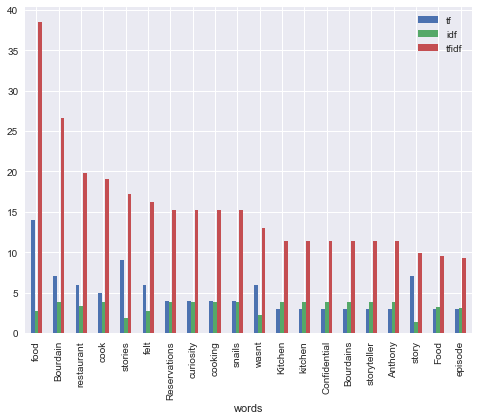

In [130]:
top_vacab.plot(x ='words', kind='bar', figsize=(8,6)) 

## Word Cloud of article contents

(-0.5, 999.5, 499.5, -0.5)

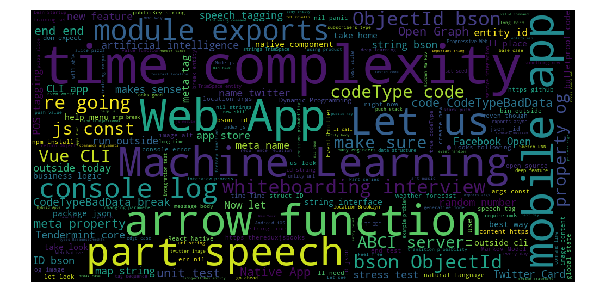

In [131]:
k= (' '.join(df['Text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Count of No. of articles from each tag

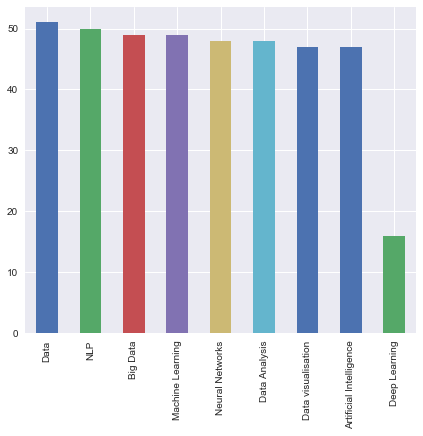

In [164]:
sns.set(style="darkgrid")
df['Category'].value_counts().plot(x='Tags',kind='bar',figsize=(7,6))

In [216]:
source = []
links = df['Link']

for link in links:
    spltAr = link.split("://");
    i = (0,1)[len(spltAr)>1];
    dm = spltAr[i].split("?")[0].split('/')[0].split(':')[0].lower()
    source.append(dm)



## countplot of article source 

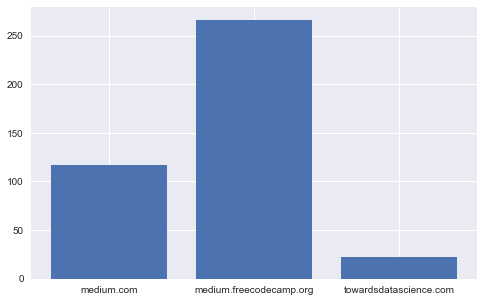

In [205]:
c = Counter(source)

plt.figure(figsize=(8,5))
plt.bar(c.keys(), c.values())
plt.show()